# Assignment 3: Classification with Logistic Regression  [ __ /130  marks]

<hr>
<!-- <img src=https://www.tibco.com/sites/tibco/files/media_entity/2020-09/logistic-regression-diagram.svg width=600> -->
<img src=https://miro.medium.com/max/1838/1*wWRGcsBwoXw-WNJi5UpoOw.png width=600>
<hr>

In this assignment we will consider the `diabetes` dataset from kaggle: https://www.kaggle.com/kandij/diabetes-dataset

We will use logistic regression to classify subjects based on the input features; we will also evaluate our model with/without regularization.

## Before you start...
* check out the relevant lecture code (L3_codeF.ipynb) for reference

## Before you submit...
* restart the kernel, then re-run the whole notebook to ensure no errors

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

import matplotlib.pyplot as plt
%matplotlib inline

## Question 1.1 [ _ /4 marks]

Read the file `diabetes.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. 

In [2]:
# ****** your code here ******
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1.2 [ _ /10 marks]

Please answer the following short-answer questions `(a-d)`. Your answer can be brief (a few words or a sentence).

**(a) How many input features does this dataset have?**  

Your answer:There are 8 input features: (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age).

**(b) What is the dependent variable?** 

Your answer: The dependent variable is "Outcome".

**(c) How many classes are there?**

Your answer: There are 2 classes, 0 and 1.

**(d) Is the dataset class-balanced? Check with some code.**

In [3]:
# ****** your code here ******
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Your answer: This dataset is not class balanced, it is class unbalanced as 0 and 1 do not have the same number of instances. 

## Question 1.3 [ _ /12 marks]

Split the data into train and test sets: Use `train_test_split` with `random_state=0`. Use 50% of the data for training and 50% for testing.

In [4]:
# Store the input values into a variable called "X" [ /4 marks]
X = diabetes.iloc[:,0:8].values

# Convert 0's and 1's to "Pos" and "Neg" class labels. Store the output class values into variable "y" [ /6 marks]
y = diabetes.Outcome.replace({0:"Neg", 1:"Pos"})

# Split your X and y data using train_test_split [ /2 marks]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50, random_state=0)

## Question 1.4 [ _ /16 marks]

Consider sklearn's `LogisticRegression` class. Create a `LogisticRegression` object with `penalty=none`. Train and test this classifier using "Insulin" as the independent variable and "Outcome" as the dependent variable. Make a scatter plot of the points. Plot your prediction on the same graph.

Intercept:[-0.79113624]
Coefficents:[[0.00220983]]


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Insulin to Diabetes'}, xlabel='Insulin', ylabel='Outcome of Diabetes'>

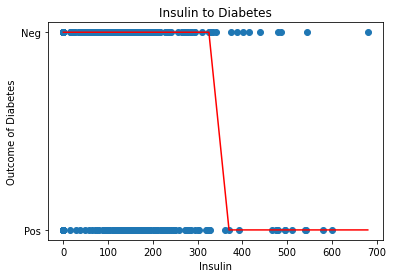

In [15]:
# Create a LogisticRegression object without regularization [ /2 marks]
logistic_regression= LogisticRegression(penalty="none", max_iter=10000)

# Create training data and test data for X [ /4 marks]
Xtrain2 = Xtrain[:,[4]]
Xtest2 = Xtest[:,[4]]

# Fit to your training data using Logistic Regression [ /2 marks]
logistic_regression = logistic_regression.fit(Xtrain2, ytrain)
print(f"Intercept:{logistic_regression.intercept_}\nCoefficents:{logistic_regression.coef_}")

y_pred = logistic_regression.predict(Xtest2)

# Create a scatter plot of the test data. Also plot your prediction. [ /8 marks]
plt.scatter(diabetes['Insulin'], diabetes['Outcome'])
plt.xlabel("Insulin")
plt.ylabel("Outcome of Diabetes")
plt.title("Insulin to Diabetes")
sns.lineplot(Xtest2.reshape(-1), y_pred, color='red')

## Question 1.5 [ _ /12 marks]

How many True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) were there from your classification test results in question 1.4? What was the test accuracy of your classifier? You can use the following formula:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [6]:
# Calculate tp, tn, fp, fn, and test accuracy
tp = sum(np.logical_and(y_pred == logistic_regression.classes_[1], ytest == logistic_regression.classes_[1]))
tn = sum(np.logical_and(y_pred == logistic_regression.classes_[0], ytest == logistic_regression.classes_[0]))
fp = sum(np.logical_and(y_pred == logistic_regression.classes_[1], ytest == logistic_regression.classes_[0]))
fn = sum(np.logical_and(y_pred == logistic_regression.classes_[0], ytest == logistic_regression.classes_[1]))

accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
print("Accuracy:",round(accuracy,3))

tp: 6 tn: 248 fp: 5 fn: 125
Accuracy: 0.661


## Question 1.6 [ _ /18 marks]

Now try adjusting the decision threshold to 0.35 (instead of the default, which is 0.5). Report TP, TN, FP, FN, and Accuracy.

In [7]:
# Using your fit from question 1.4, adjust the decision threshold and get the updated predictions [ /6 marks]
y_test_prob = logistic_regression.predict_proba(Xtest2)
yhat = logistic_regression.classes_[(y_test_prob[:,1]>0.35).astype('int')]

# Calculate tp, tn, fp, fn, and test accuracy [ /12 marks]
tp = sum(np.logical_and(yhat == logistic_regression.classes_[1], ytest == logistic_regression.classes_[1]))
tn = sum(np.logical_and(yhat == logistic_regression.classes_[0], ytest == logistic_regression.classes_[0]))
fp = sum(np.logical_and(yhat == logistic_regression.classes_[1], ytest == logistic_regression.classes_[0]))
fn = sum(np.logical_and(yhat == logistic_regression.classes_[0], ytest == logistic_regression.classes_[1]))

accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
print("Accuracy:",round(accuracy,3))

tp: 58 tn: 174 fp: 79 fn: 73
Accuracy: 0.604


## Question 1.7 [ _ /6 marks]

What happens when the threshold is lowered from question 1.5 to question 1.6? Could one model be more useful than the other? Answer in a few sentences.

Your answer: When the threshold is lowered this means that more false positives will be found which is the case in our model. We have more incorrect positive predictions. The model with the more false positives may be more useful as there are less false negatives which are a greater risk than a false positive.

## Question 1.8 [ _ /18 marks]

Create another `LogisticRegression` object with `penalty=none`. Train and test this classifier, this time using all input features. Calculate TP, FP, TN, FN, and Accuracy.

In [8]:
# Create a LogisticRegression object without regularization [ /2 marks]
logistic_regression2= LogisticRegression(penalty="none", max_iter=10000)

# Fit to your training data using Logistic Regression [ /2 marks]
logistic_regression2 = logistic_regression2.fit(Xtrain, ytrain)

# Compute your test predictions, given the test inputs [ /2 marks]
y_test_prob2 = logistic_regression2.predict_proba(Xtest)
y_pred2 = logistic_regression2.predict(Xtest)

# Calculate tp, tn, fp, fn, and test accuracy [ /12 marks]
tp = sum(np.logical_and(y_pred2 == logistic_regression2.classes_[1], ytest == logistic_regression2.classes_[1]))
tn = sum(np.logical_and(y_pred2 == logistic_regression2.classes_[0], ytest == logistic_regression2.classes_[0]))
fp = sum(np.logical_and(y_pred2 == logistic_regression2.classes_[1], ytest == logistic_regression2.classes_[0]))
fn = sum(np.logical_and(y_pred2 == logistic_regression2.classes_[0], ytest == logistic_regression2.classes_[1]))

accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
print("Accuracy:",round(accuracy,3))

tp: 75 tn: 228 fp: 25 fn: 56
Accuracy: 0.789


## Question 1.9 [ _ /20 marks]

Create a final `LogisticRegression` object with `penalty=l2`, `C=0.01`. Train and test this classifier using all input features. Calculate TP, FP, TN, FN, and Accuracy. Did regularization help in this case? 

In [17]:
# Create a LogisticRegression object with l2 regularization [ /2 marks]
logistic_regression3= LogisticRegression(penalty="l2", C=0.01, max_iter=10000)

# Fit to your training data using Logistic Regression [ /2 marks]
logistic_regression3 = logistic_regression3.fit(Xtrain, ytrain)

# Compute your test predictions, given the test inputs [ /2 marks]
y_test_prob3 = logistic_regression3.predict_proba(Xtest)
y_pred3 = logistic_regression3.predict(Xtest)

print(f"Intercept:{logistic_regression3.intercept_}\nCoefficents:{logistic_regression3.coef_}")

# Calculate tp, tn, fp, fn, and test accuracy [ /12 marks]
tp = sum(np.logical_and(y_pred3 == logistic_regression3.classes_[1], ytest == logistic_regression3.classes_[1]))
tn = sum(np.logical_and(y_pred3 == logistic_regression3.classes_[0], ytest == logistic_regression3.classes_[0]))
fp = sum(np.logical_and(y_pred3 == logistic_regression3.classes_[1], ytest == logistic_regression3.classes_[0]))
fn = sum(np.logical_and(y_pred3 == logistic_regression3.classes_[0], ytest == logistic_regression3.classes_[1]))

accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
print("Accuracy:",round(accuracy,3))

Intercept:[-7.8101877]
Coefficents:[[ 0.07435517  0.03187323 -0.00740335  0.00682325 -0.00105428  0.08025804
   0.0635965   0.02137411]]
tp: 74 tn: 228 fp: 25 fn: 57
Accuracy: 0.786


Your answer: 
In this case, regularization did not help or change much in the data. If we take a look at the coefficients they are very small, therefore using regularization and penalizing the size of the parameters does not do a lot for our data since it is already so small.

## Question 2.1 [ _ /14 marks]

Plot ROC Curves for the classifiers you used in questions 1.4, 1.8, and 1.9. Use AUC to determine which classifier is the best. State the best classifier.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AUC for Model 1: 0.5322994297438373
AUC for Model 2: 0.848052379084573
AUC for Model 3: 0.8391817276649669


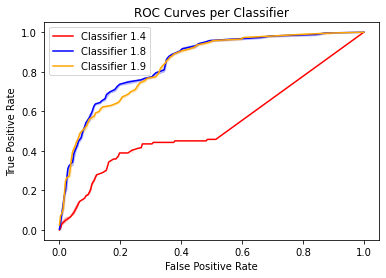

In [19]:
# Use roc_curve to get FPR and TPR for each of the 3 classifiers [ /6 marks]
fpr, tpr, _ = roc_curve(ytest, y_test_prob[:,1], pos_label="Pos") 
fpr2, tpr2, _ = roc_curve(ytest, y_test_prob2[:,1], pos_label="Pos") 
fpr3, tpr3, _ = roc_curve(ytest, y_test_prob3[:,1], pos_label="Pos") 

# Plot all of the ROC curves [ /3 marks]
ax = sns.lineplot(fpr,tpr, color="red")
ax2 = sns.lineplot(fpr2,tpr2, color="blue")
ax3 = sns.lineplot(fpr3,tpr3, color="orange")

# Determine AUC for each of the ROC curves [ /3 marks]
print(f"AUC for Model 1: {auc(fpr,tpr)}")
print(f"AUC for Model 2: {auc(fpr2,tpr2)}")
print(f"AUC for Model 3: {auc(fpr3,tpr3)}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves per Classifier")
plt.legend(["Classifier 1.4","Classifier 1.8","Classifier 1.9"])

Your answer: The best classifier in this case is classifier 1.8 where the auc value is as close to 1 as possible and therefore the area under the curve is the greatest, in this case classifier 1.8 has the highest auc of approximately 0.8433.